<a href="https://colab.research.google.com/github/KorvenDalas/AI-ML-FS/blob/main/AI%26ML_FS_CW1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence and Machine Learning in Finance Services

## Historical Stock Price Data

In [77]:
! pip install yahooquery

In [78]:
# Import necessary libraries
import pandas as pd                 # Data manipulation
import numpy as np                  # Numerical operations
import matplotlib.pyplot as plt     # Plotting library
import seaborn as sns               # Advanced plotting (heatmaps, etc.)
from yahooquery import Ticker       # For retrieving stock data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay


# Define ticker and date range
ticker = "SONY"
start_date = "2014-01-01"
end_date = "2024-12-31"

# Initialise the Ticker object
sony = Ticker(ticker)

# Retrieve historical data
df = sony.history(start = start_date, end = end_date)

# Capitalise the first letter of each column for consistency
df.columns = [col.capitalize() for col in df.columns]

# Display the first few rows
print("Sony Historical Daily Data:")
print(df.head())

Sony Historical Daily Data:
                    Open   High    Low  Close    Volume  Adjclose  Dividends  \
symbol date                                                                    
SONY   2014-01-02  3.466  3.478  3.416  3.432  13127000  2.741685        0.0   
       2014-01-03  3.442  3.452  3.424  3.436   4642000  2.744881        0.0   
       2014-01-06  3.460  3.498  3.454  3.460  11781500  2.764054        0.0   
       2014-01-07  3.472  3.476  3.440  3.464  17191500  2.767249        0.0   
       2014-01-08  3.480  3.664  3.452  3.650  42864500  2.915837        0.0   

                   Splits  
symbol date                
SONY   2014-01-02     0.0  
       2014-01-03     0.0  
       2014-01-06     0.0  
       2014-01-07     0.0  
       2014-01-08     0.0  


/usr/local/lib/python3.11/dist-packages/yahooquery/utils/__init__.py:1470: FutureWarning: 'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.
  has_live_indice = index_utc[-1] >= last_trade - pd.Timedelta(2, "S")
/usr/local/lib/python3.11/dist-packages/yahooquery/ticker.py:1333: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dividends"].fillna(0, inplace=True)
/usr/local/lib/python3.11/dist-packages/yahooquery/ticker.py:1335: FutureWarning: A value is trying to be set on a copy of a Dat

In [79]:
# Display ESG scores for Sony
sony.esg_scores

{'SONY': 'No fundamentals data found for any of the summaryTypes=esgScores'}

In [80]:
# Display key statistics
sony.key_stats

{'SONY': {'maxAge': 1,
  'priceHint': 2,
  'enterpriseValue': 3448019091456,
  'profitMargins': 0.082049996,
  'floatShares': 6021870553,
  'sharesOutstanding': 6024350208,
  'sharesShort': 9191218,
  'sharesShortPriorMonth': 7963873,
  'sharesShortPreviousMonthDate': '2025-01-15 00:00:00',
  'dateShortInterest': '2025-02-14 00:00:00',
  'sharesPercentSharesOut': 0.0015,
  'heldPercentInsiders': 0.00029999999,
  'heldPercentInstitutions': 0.07749,
  'shortRatio': 2.26,
  'shortPercentOfFloat': 0.0015,
  'beta': 0.725,
  'impliedSharesOutstanding': 6179210240,
  'category': None,
  'bookValue': 1358.498,
  'priceToBook': 0.016790602,
  'fundFamily': None,
  'legalType': None,
  'lastFiscalYearEnd': '2024-03-31 00:00:00',
  'nextFiscalYearEnd': '2025-03-31 00:00:00',
  'mostRecentQuarter': '2024-12-31 00:00:00',
  'earningsQuarterlyGrowth': 0.027,
  'netIncomeToCommon': 1132877971456,
  'trailingEps': 1.26,
  'forwardEps': 1.19,
  'lastSplitFactor': '5:1',
  'lastSplitDate': '2024-10-09 

In [81]:
# Display summary profile
sony.summary_profile

{'SONY': {'address1': '7-1, Konan 1-chome',
  'address2': 'Minato-ku',
  'city': 'Tokyo',
  'zip': '108-0075',
  'country': 'Japan',
  'phone': '81-3-6748-2111',
  'website': 'https://www.sony.com',
  'industry': 'Consumer Electronics',
  'industryKey': 'consumer-electronics',
  'industryDisp': 'Consumer Electronics',
  'sector': 'Technology',
  'sectorKey': 'technology',
  'sectorDisp': 'Technology',
  'longBusinessSummary': 'Sony Group Corporation designs, develops, produces, and sells electronic equipment, instruments, and devices for the consumer, professional, and industrial markets in Japan, the United States, Europe, China, the Asia-Pacific, and internationally. The company distributes software titles and add-on content through digital networks; network services related to game, video, and music content; and home gaming consoles, packaged and game software, and peripheral devices. It also develops, produces, markets, and distributes recorded music; publishes music; and produces 

## Feature Engineering

In [82]:
# Remove any rows with missing values
df = df.dropna()

# New column 'H-L' represents the intraday range
df['H-L'] = df['High'] - df['Low']

# New column 'O-C' represents the net price movement during the day
df['O-C'] = df['Close'] - df['Open']

In [83]:
# Calculate moving averages based on the previous day's Close (to avoid lookahead bias)
df['3d_MA'] = df['Close'].shift(1).rolling(window = 3).mean()
df['10d_MA'] = df['Close'].shift(1).rolling(window = 10).mean()
df['30d_MA'] = df['Close'].shift(1).rolling(window = 30).mean()

# Calculate a 5-day rolling standard deviation of the Close price
df['5d_StdDev_MA'] = df['Close'].shift(1).rolling(window = 5).std()

# Binary indicator 'Price_Rise': 1 if the next day's Close is higher than the current day's, else 0
df['Price_Rise'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [84]:
# Calculate price change (delta) between consecutive days
delta = df['Close'].diff()

# Separate gains and losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)  # Convert losses to positive values

# Calculate the rolling averages of gains and losses
avg_gain = gain.rolling(window = 14, min_periods = 14).mean()
avg_loss = loss.rolling(window = 14, min_periods = 14).mean()

# Calculate the Relative Strength (RS)
rs = avg_gain / avg_loss

# Compute the RSI using the formula: RSI = 100 - (100 / (1 + RS))
df['RSI'] = 100 - (100 / (1 + rs))

In [85]:
# Calculate total rows and number of rows with any missing values
total_rows = df.shape[0]
nan_rows = df.isnull().any(axis=1).sum()
data_loss = (nan_rows / total_rows) * 100

# Print data loss information
print("Total number of rows:", total_rows)
print("Number of rows with NaN:", nan_rows)
print(f"Data loss: {data_loss:.2f}%")

Total number of rows: 2767
Number of rows with NaN: 30
Data loss: 1.08%


In [86]:
# Drop rows that still contain NaN values after rolling calculations
df = df.dropna()
df.head()

Open   High    Low  Close    Volume  Adjclose  Dividends  \
symbol date                                                                    
SONY   2014-02-14  3.358  3.426  3.358  3.412  20059500  2.725708        0.0   
       2014-02-18  3.460  3.478  3.440  3.468   9163500  2.770444        0.0   
       2014-02-19  3.422  3.450  3.404  3.414  13277000  2.727306        0.0   
       2014-02-20  3.420  3.444  3.396  3.434   8962000  2.743283        0.0   
       2014-02-21  3.448  3.466  3.424  3.424   7017500  2.735295        0.0   

                   Splits    H-L    O-C     3d_MA  10d_MA    30d_MA  \
symbol date                                                           
SONY   2014-02-14     0.0  0.068  0.054  3.442000  3.2930  3.378600   
       2014-02-18     0.0  0.038  0.008  3.438667  3.3192  3.377933   
       2014-02-19     0.0  0.046 -0.008  3.440000  3.3610  3.379000   
       2014-02-20     0.0  0.048  0.014  3.431333  3.3804  3.377467   
       2014-02-21     0.0  0.042 -0.024  3.438667  3.4058  3.376467   

                   5d_StdDev_MA  Price_Rise        RSI  
symbol date                                             
SONY   2014-02-14      0.053471           1  59.161140  
       2014-02-18      0.048283           0  59.956708  
       2014-02-19      0.024803           1  61.283182  
       2014-02-20      0.026548           0  61.453739  
       2014-02-21      0.022777           1  66.270775

## Exploratory data analysis (EDA)

In [87]:
# Print summary statistics (count, mean, std, min, quartiles, max)
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Open,High,Low,Close,Volume,Adjclose,Dividends,Splits,H-L,O-C,3d_MA,10d_MA,30d_MA,5d_StdDev_MA,Price_Rise,RSI
count,2737.000000,2737.000000,2737.000000,2737.000000,2.737000e+03,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000
mean,12.178984,12.266503,12.085399,12.176568,5.807224e+06,11.360313,0.000860,0.001827,0.181104,-0.002417,12.163529,12.140747,12.076301,0.188061,0.515893,52.748332
std,6.023946,6.068296,5.973990,6.019966,4.498368e+06,6.077005,0.012516,0.095572,0.149587,0.140500,6.017336,6.011001,5.993498,0.156941,0.499839,17.550090
min,3.200000,3.208000,3.186000,3.198000,9.410000e+05,2.643097,0.000000,0.000000,0.014000,-1.292000,3.216000,3.233800,3.265667,0.008602,0.000000,0.849864
25%,6.300000,6.334000,6.264000,6.292000,3.189500e+06,5.347353,0.000000,0.000000,0.072000,-0.050000,6.270000,6.248800,6.225067,0.078136,0.000000,40.074880
50%,11.280000,11.376000,11.138000,11.252000,4.474500e+06,10.128294,0.000000,0.000000,0.144000,0.002000,11.202667,11.166200,11.230200,0.144499,1.000000,53.621358
75%,17.476000,17.604000,17.351999,17.452000,6.876500e+06,17.070768,0.000000,0.000000,0.244001,0.052000,17.422000,17.389600,17.463600,0.251147,1.000000,65.371061
max,26.712000,26.750000,25.662001,25.718000,7.839700e+07,24.329948,0.287000,5.000000,1.521999,0.942001,25.561333,25.290800,24.823000,1.610327,1.000000,95.066117


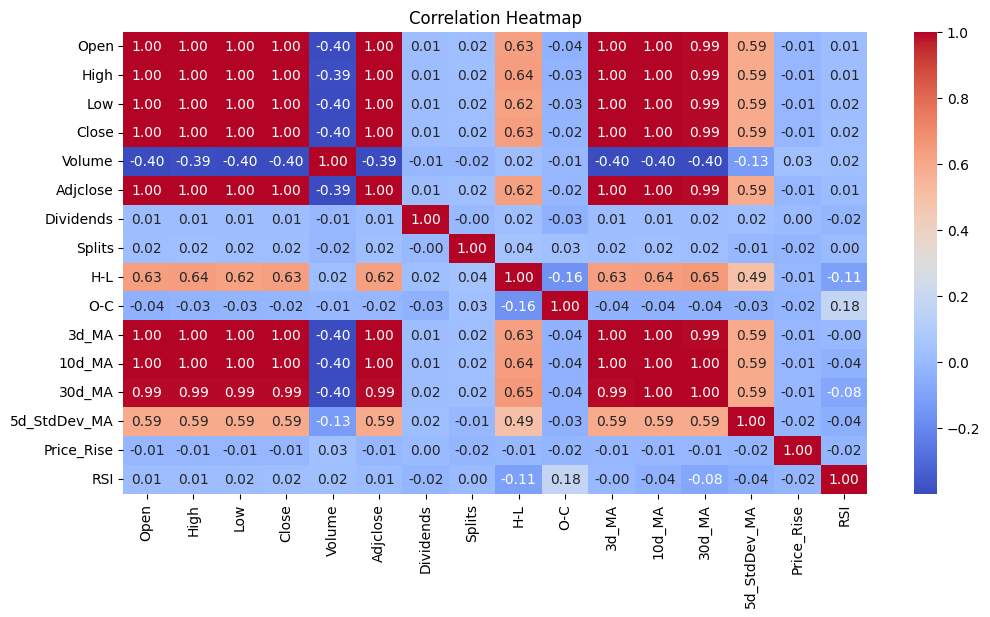

In [88]:
# Correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

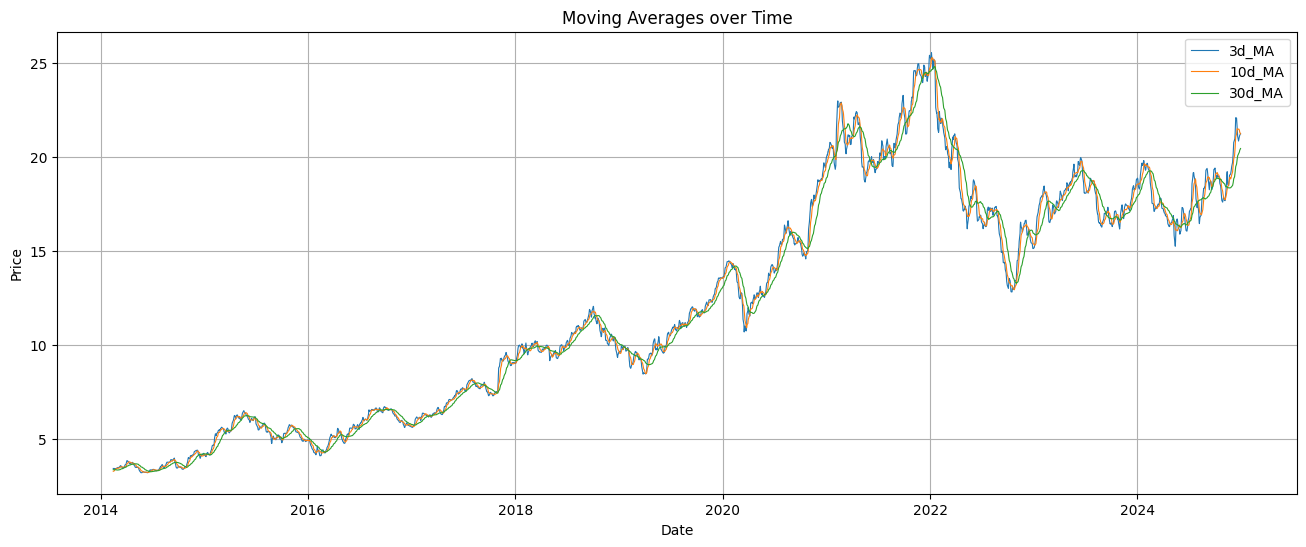

In [89]:
# Plot the 3-day, 10-day, and 30-day moving averages over time
plt.figure(figsize = (16, 6))
plt.plot(df.index.get_level_values('date'), df['3d_MA'], label = '3d_MA', linewidth = 0.8)
plt.plot(df.index.get_level_values('date'), df['10d_MA'], label = '10d_MA', linewidth = 0.8)
plt.plot(df.index.get_level_values('date'), df['30d_MA'], label = '30d_MA', linewidth = 0.8)
plt.title("Moving Averages over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

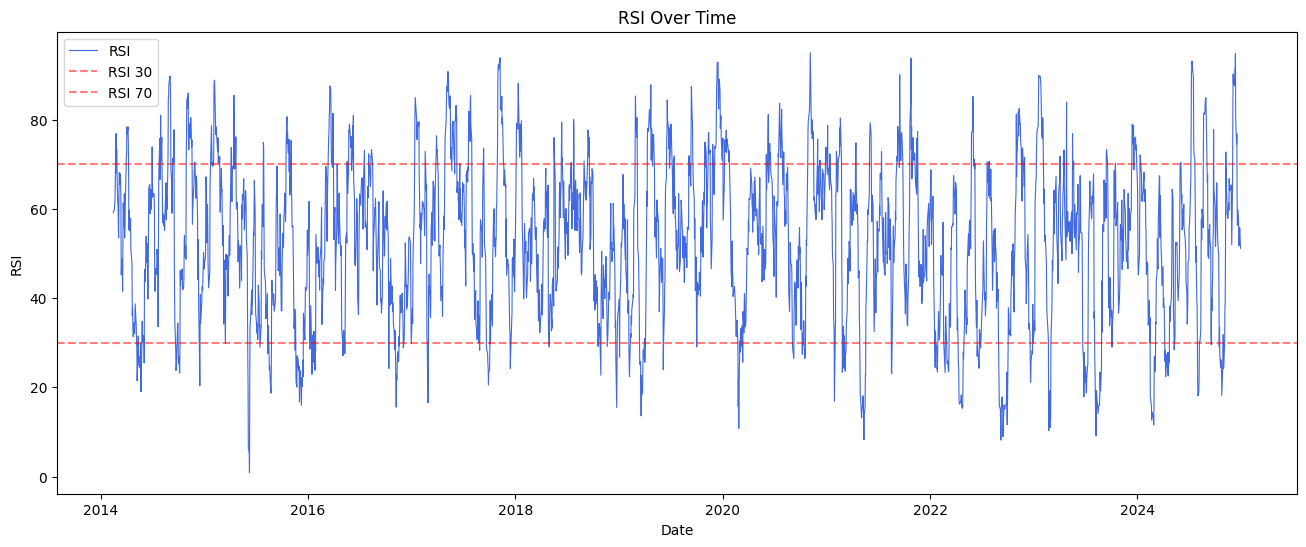

In [90]:
# Plot the RSI over time with horizontal lines indicating oversold (30) and overbought (70) thresholds
plt.figure(figsize = (16, 6))
plt.plot(df.index.get_level_values('date'), df['RSI'], label = 'RSI', color = 'royalblue', linewidth = 0.8)
plt.axhline(y = 30, color = 'red', linestyle = '--', alpha = 0.5, label = 'RSI 30')
plt.axhline(y = 70, color = 'red', linestyle = '--', alpha = 0.5, label = 'RSI 70')
plt.title("RSI Over Time")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()


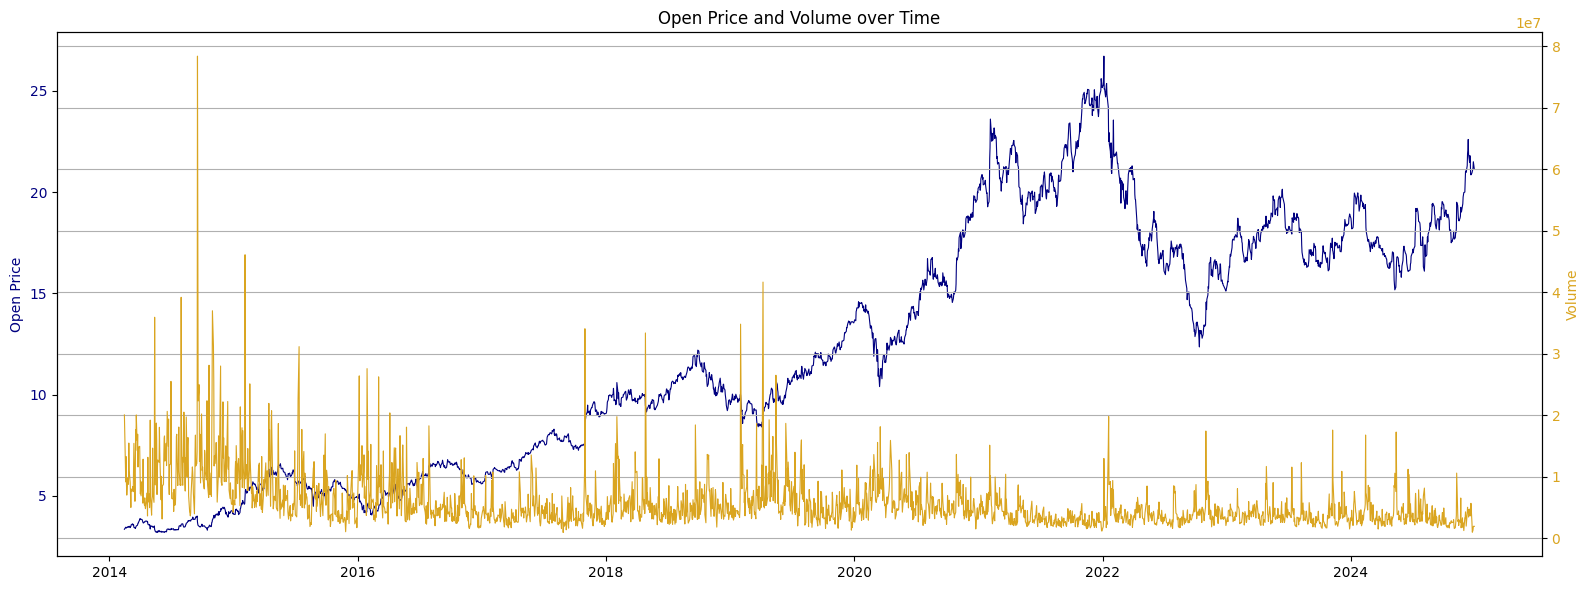

In [91]:
# Plot Open Price and Volume on the same graph with twin y-axes
fig, ax1 = plt.subplots(figsize = (16, 6))

# Plot the Open price on the left y-axis
ax1.plot(df.index.get_level_values('date'), df['Open'], color = 'navy', label = 'Open', linewidth = 0.8)
ax1.set_ylabel('Open Price', color = 'navy')
ax1.tick_params(axis = 'y', labelcolor = 'navy')

# Plot the Volume on the right y-axis
ax2 = ax1.twinx()
ax2.plot(df.index.get_level_values('date'), df['Volume'], color = 'goldenrod', label = 'Volume', linewidth = 0.8)
ax2.set_ylabel('Volume', color = 'goldenrod')
ax2.tick_params(axis = 'y', labelcolor = 'goldenrod')

plt.title("Open Price and Volume over Time")
fig.tight_layout()
plt.grid()
plt.show()

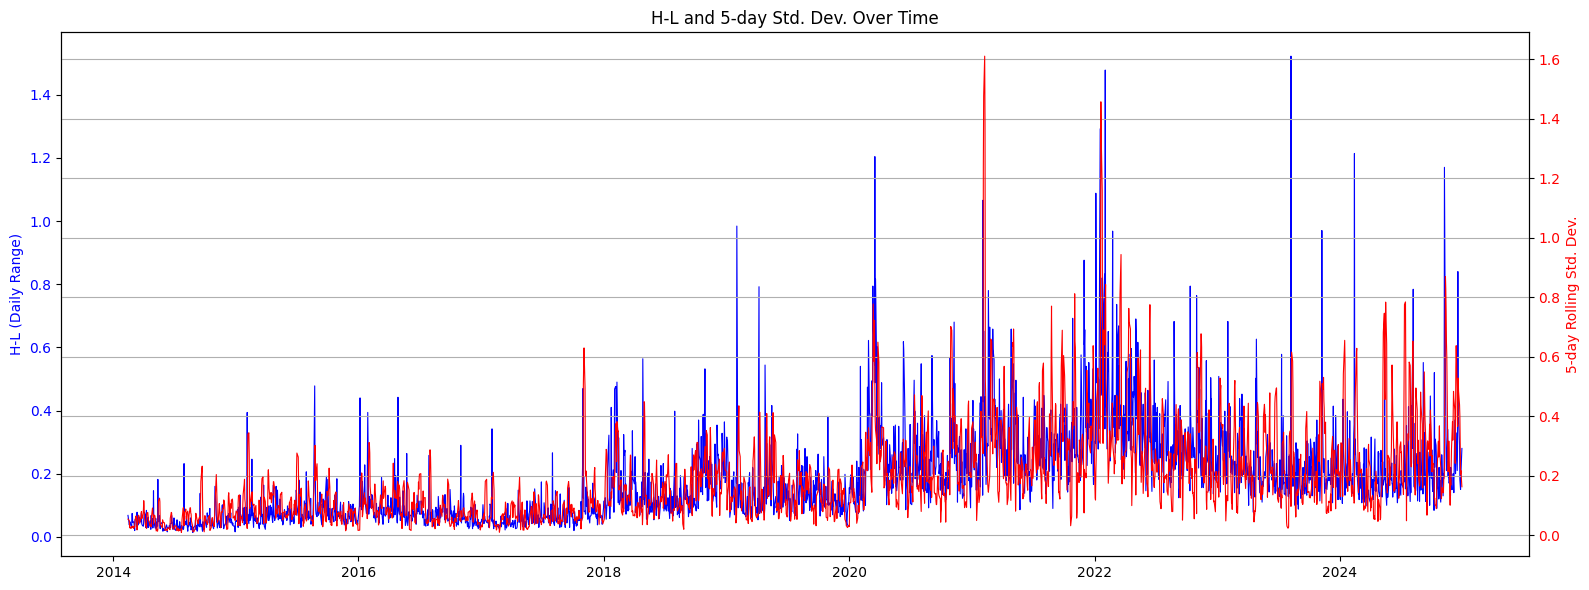

In [92]:
# Plot the intraday range (H-L) and 5-day rolling standard deviation on twin y-axes
fig, ax1 = plt.subplots(figsize = (16, 6))

# Plot H-L on the left y-axis
ax1.plot(df.index.get_level_values('date'), df['H-L'], color = 'blue', label = 'H-L', linewidth = 0.8)
ax1.set_ylabel('H-L (Daily Range)', color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

# Plot 5-day standard deviation on the right y-axis
ax2 = ax1.twinx()
ax2.plot(df.index.get_level_values('date'), df['5d_StdDev_MA'], color = 'red', label = '5d_StdDev_MA', linewidth = 0.8)
ax2.set_ylabel('5-day Rolling Std. Dev.', color = 'red')
ax2.tick_params(axis='y', labelcolor = 'red')

plt.title("H-L and 5-day Std. Dev. Over Time")
fig.tight_layout()
plt.grid()
plt.show()

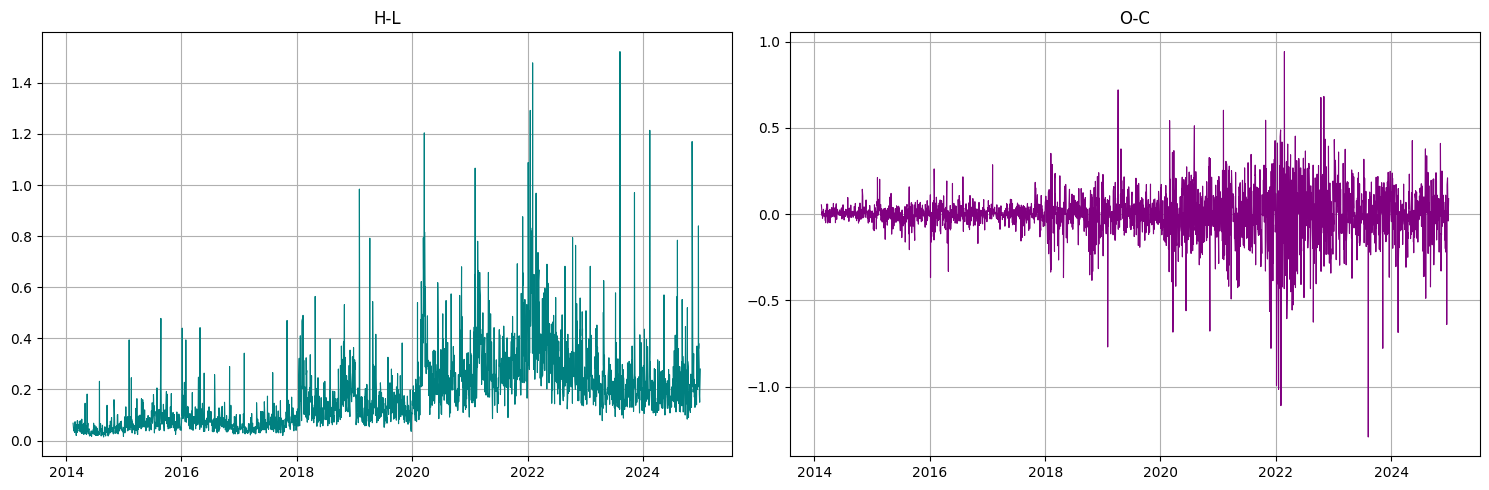

In [93]:
# Create subplots to display H-L and O-C side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left subplot: Plot H-L (Intraday range)
axes[0].plot(df.index.get_level_values('date'), df['H-L'], linewidth = 0.8, color = 'teal')
axes[0].set_title('H-L')
axes[0].grid()

# Right subplot: Plot O-C (Price change from Open to Close)
axes[1].plot(df.index.get_level_values('date'), df['O-C'], linewidth = 0.8, color = 'purple')
axes[1].set_title('O-C')
axes[1].grid()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

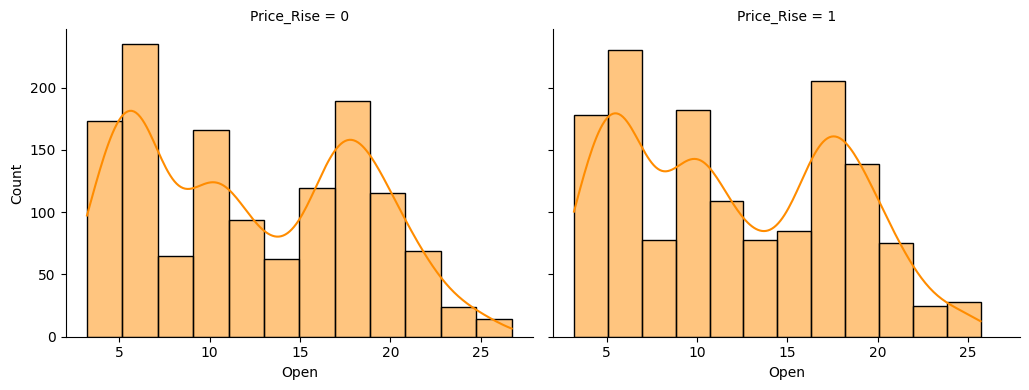

In [94]:
# Display histograms of the 'Open' price, split by the 'Price_Rise' indicator
chart = sns.FacetGrid(df, col = "Price_Rise", height = 4, aspect = 1.3)
chart.map(sns.histplot, "Open", kde = True, color = "darkorange")
plt.show()

## Data Preprocessing for Machine Learning Classification

In [95]:
# Select columns for X (features)
X = df[[ 'O-C', 'H-L', 'RSI', 'Close', 'Volume', '10d_MA', '30d_MA', '5d_StdDev_MA']]

# Select column for y (target)
y = df['Price_Rise']

In [96]:
# Split the dataset into training and testing sets without shuffling (important for time series)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
X_test

O-C       H-L        RSI      Close   Volume   10d_MA  \
symbol date                                                                     
SONY   2022-10-25  0.230000  0.264000  48.610063  13.448000  4188000  12.9528   
       2022-10-26  0.094000  0.282000  49.658821  13.464000  3591500  13.0142   
       2022-10-27 -0.076000  0.250000  51.778657  13.372000  2855000  13.0972   
       2022-10-28  0.205999  0.232000  58.677036  13.570000  3658500  13.1310   
       2022-10-31  0.058001  0.200001  64.006797  13.494000  5029500  13.2034   
...                     ...       ...        ...        ...      ...      ...   
       2024-12-23  0.209999  0.289999  57.202512  21.160000  2500400  21.4920   
       2024-12-24  0.119999  0.180000  51.748248  21.139999   979900  21.4980   
       2024-12-26  0.000000  0.150002  53.301895  21.180000  1306500  21.4350   
       2024-12-27 -0.040001  0.200001  55.803558  21.459999  1936600  21.3360   
       2024-12-30  0.089998  0.280001  51.203487  21.209999  1934500  21.2440   

                      30d_MA  5d_StdDev_MA  
symbol date                                 
SONY   2022-10-25  13.446333      0.054468  
       2022-10-26  13.414533      0.214824  
       2022-10-27  13.383067      0.254910  
       2022-10-28  13.349733      0.227350  
       2022-10-31  13.322867      0.207173  
...                      ...           ...  
       2024-12-23  20.172667      0.437573  
       2024-12-24  20.214333      0.398911  
       2024-12-26  20.281667      0.204255  
       2024-12-27  20.365333      0.217071  
       2024-12-30  20.464000      0.162234  

[548 rows x 8 columns]

In [97]:
# Standardise features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
# Define class names explicitly
class_names = ['No Price Rise (0)', 'Price Rise (1)']

## Extra Tree Classifier

In [99]:
# Initialise and train the Extra Trees Classifier
extra_tree_clf = ExtraTreesClassifier(random_state = 2025)
extra_tree_clf.fit(X_train, Y_train)

# Predict the target for the test set
Y_pred_ET = extra_tree_clf.predict(X_test)

# Perform 5-fold cross-validation on the training set and calculate accuracy
scores_ET = cross_val_score(extra_tree_clf, X_train, Y_train, cv = 5, scoring = 'accuracy')

In [100]:
# Print the classification report and performance metrics for the Extra Trees Classifier
print("--- Extra Tree Classifier Report ---\n")
print(classification_report(Y_test, Y_pred_ET))
print(f"Accuracy:   {accuracy_score(Y_test, Y_pred_ET):.3f}")
print(f"Precision:  {precision_score(Y_test, Y_pred_ET):.3f}")
print(f"Recall:     {recall_score(Y_test, Y_pred_ET):.3f}\n")
print("Extra Tree Classifier -> Cross Validation Accuracy: Mean = %0.3f Std = %0.3f" % (np.mean(scores_ET), np.std(scores_ET)))

--- Extra Tree Classifier Report ---

              precision    recall  f1-score   support

           0       0.48      0.50      0.49       265
           1       0.51      0.49      0.50       283

    accuracy                           0.50       548
   macro avg       0.50      0.50      0.50       548
weighted avg       0.50      0.50      0.50       548

Accuracy:   0.498
Precision:  0.515
Recall:     0.495

Extra Tree Classifier -> Cross Validation Accuracy: Mean = 0.494 Std = 0.026


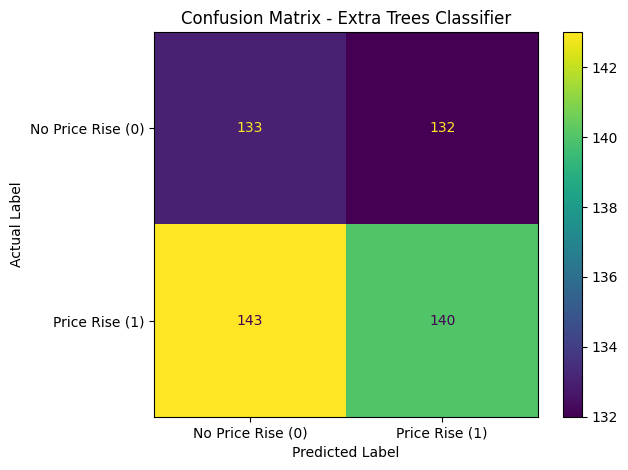

In [101]:
# Confusion matrix visualization with labels
matrix_ET = ConfusionMatrixDisplay.from_estimator(
    extra_tree_clf, X_test, Y_test,
    display_labels = class_names)

# Add titles and axis labels
plt.title('Confusion Matrix - Extra Trees Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

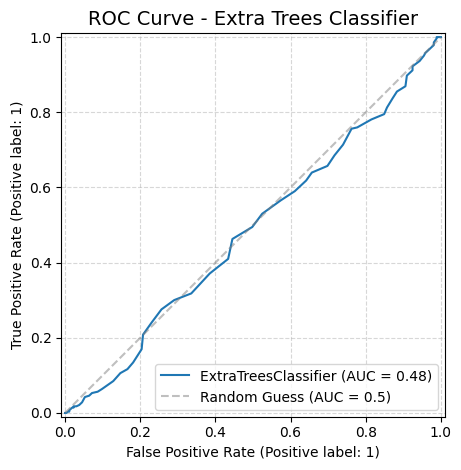

In [102]:
# Plot the ROC curve with visuals
roc_disp = RocCurveDisplay.from_estimator(
    extra_tree_clf, X_test, Y_test)

# Diagonal line representing random guess baseline (AUC=0.5)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray', label = 'Random Guess (AUC = 0.5)', alpha = 0.5)

plt.title('ROC Curve - Extra Trees Classifier', fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

## Naive Bayes Classifier

In [103]:
# Initialise and train the Gaussian Naive Bayes Classifier
naive_bayes_clf = GaussianNB()
naive_bayes_clf.fit(X_train, Y_train)

# Predict the target for the test set
Y_pred_NB = naive_bayes_clf.predict(X_test)

# Perform 5-fold cross-validation on the training set and calculate accuracy
scores_NB = cross_val_score(naive_bayes_clf, X_train, Y_train, cv = 5, scoring = 'accuracy')

In [104]:
# Print the classification report and performance metrics for the Naive Bayes Classifier
print("--- Naive Bayes Report ---\n")
print(classification_report(Y_test, Y_pred_NB))
print(f"Accuracy:   {accuracy_score(Y_test, Y_pred_NB):.3f}")
print(f"Precision:  {precision_score(Y_test, Y_pred_NB):.3f}")
print(f"Recall:     {recall_score(Y_test, Y_pred_NB):.3f}\n")
print("Naive Bayes Classifier -> Cross Validation Accuracy: Mean = %0.3f Std = %0.3f" % (np.mean(scores_NB), np.std(scores_NB)))

--- Naive Bayes Report ---

              precision    recall  f1-score   support

           0       0.50      0.42      0.45       265
           1       0.53      0.60      0.56       283

    accuracy                           0.51       548
   macro avg       0.51      0.51      0.51       548
weighted avg       0.51      0.51      0.51       548

Accuracy:   0.515
Precision:  0.526
Recall:     0.604

Naive Bayes Classifier -> Cross Validation Accuracy: Mean = 0.507 Std = 0.013


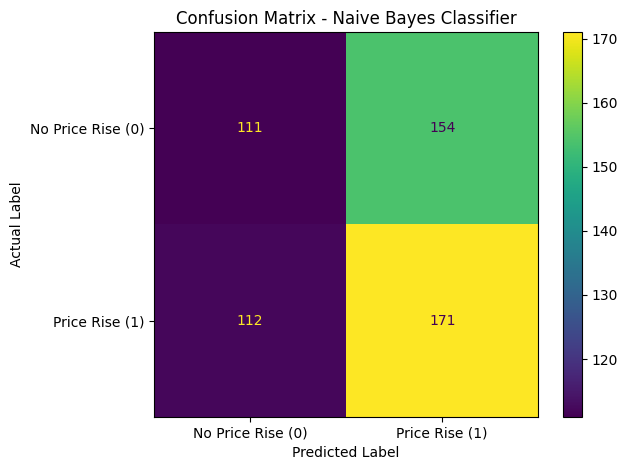

In [105]:
# Confusion matrix visualization with labels
matrix_ET = ConfusionMatrixDisplay.from_estimator(
    naive_bayes_clf, X_test, Y_test,
    display_labels = class_names)

# Add titles and axis labels
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

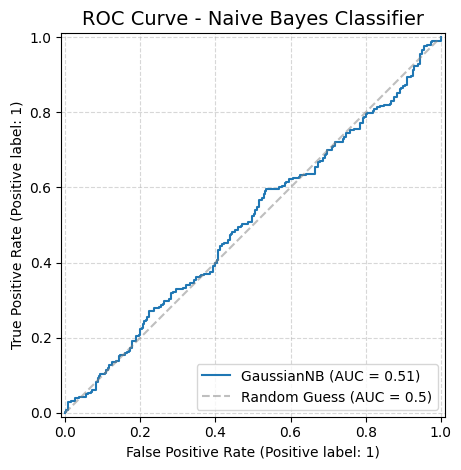

In [106]:
# Plot the ROC curve with visuals
roc_disp = RocCurveDisplay.from_estimator(
    naive_bayes_clf, X_test, Y_test)

# Diagonal line representing random guess baseline (AUC=0.5)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'gray', label = 'Random Guess (AUC = 0.5)', alpha = 0.5)

plt.title('ROC Curve - Naive Bayes Classifier', fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

## Trading Strategy - Naive Bayes

In [107]:
print(len(trade_dataset_original))

548


In [108]:
# Create a new column 'Y_pred' to store model predictions and align with the original DataFrame
df['Y_pred'] = np.NaN
df.iloc[(len(df) - len(Y_pred_NB)):, - 1] = Y_pred_NB   # Assign predictions to the last rows
trade_dataset_original = df.dropna()                    # Drop any rows with missing predictions
trade_dataset = trade_dataset_original.copy()
trade_dataset

Open       High        Low      Close   Volume  \
symbol date                                                              
SONY   2022-10-25  13.218000  13.470000  13.206000  13.448000  4188000   
       2022-10-26  13.370000  13.636000  13.354000  13.464000  3591500   
       2022-10-27  13.448000  13.592000  13.342000  13.372000  2855000   
       2022-10-28  13.364000  13.574000  13.342000  13.570000  3658500   
       2022-10-31  13.436000  13.534000  13.334000  13.494000  5029500   
...                      ...        ...        ...        ...      ...   
       2024-12-23  20.950001  21.209999  20.920000  21.160000  2500400   
       2024-12-24  21.020000  21.170000  20.990000  21.139999   979900   
       2024-12-26  21.180000  21.280001  21.129999  21.180000  1306500   
       2024-12-27  21.500000  21.530001  21.330000  21.459999  1936600   
       2024-12-30  21.120001  21.330000  21.049999  21.209999  1934500   

                    Adjclose  Dividends  Splits       H-L       O-C  \
symbol date                                                           
SONY   2022-10-25  13.138988        0.0     0.0  0.264000  0.230000   
       2022-10-26  13.154619        0.0     0.0  0.282000  0.094000   
       2022-10-27  13.064733        0.0     0.0  0.250000 -0.076000   
       2022-10-28  13.258183        0.0     0.0  0.232000  0.205999   
       2022-10-31  13.183930        0.0     0.0  0.200001  0.058001   
...                      ...        ...     ...       ...       ...   
       2024-12-23  21.160000        0.0     0.0  0.289999  0.209999   
       2024-12-24  21.139999        0.0     0.0  0.180000  0.119999   
       2024-12-26  21.180000        0.0     0.0  0.150002  0.000000   
       2024-12-27  21.459999        0.0     0.0  0.200001 -0.040001   
       2024-12-30  21.209999        0.0     0.0  0.280001  0.089998   

                       3d_MA   10d_MA     30d_MA  5d_StdDev_MA  Price_Rise  \
symbol date                                                                  
SONY   2022-10-25  12.994000  12.9528  13.446333      0.054468           1   
       2022-10-26  13.161333  13.0142  13.414533      0.214824           0   
       2022-10-27  13.313333  13.0972  13.383067      0.254910           1   
       2022-10-28  13.428000  13.1310  13.349733      0.227350           0   
       2022-10-31  13.468666  13.2034  13.322867      0.207173           1   
...                      ...      ...        ...           ...         ...   
       2024-12-23  20.863333  21.4920  20.172667      0.437573           0   
       2024-12-24  20.946667  21.4980  20.214333      0.398911           1   
       2024-12-26  21.106667  21.4350  20.281667      0.204255           1   
       2024-12-27  21.160000  21.3360  20.365333      0.217071           0   
       2024-12-30  21.260000  21.2440  20.464000      0.162234           0   

                         RSI  Y_pred  
symbol date                           
SONY   2022-10-25  48.610063     1.0  
       2022-10-26  49.658821     1.0  
       2022-10-27  51.778657     1.0  
       2022-10-28  58.677036     1.0  
       2022-10-31  64.006797     1.0  
...                      ...     ...  
       2024-12-23  57.202512     0.0  
       2024-12-24  51.748248     0.0  
       2024-12-26  53.301895     1.0  
       2024-12-27  55.803558     1.0  
       2024-12-30  51.203487     0.0  

[548 rows x 17 columns]

In [109]:
# Compute tomorrow's log returns based on the Close price
trade_dataset['Tomorrows_Returns'] = 0.
trade_dataset['Tomorrows_Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows_Returns'] = trade_dataset['Tomorrows_Returns'].shift(-1)

In [110]:
# Calculate strategy returns:
# If the model predicts a price rise, take the actual return
#   otherwise, take the negative return (short strategy)
trade_dataset['Strategy_Returns'] = 0.
trade_dataset['Strategy_Returns'] = np.where(trade_dataset['Y_pred'] == True, trade_dataset['Tomorrows_Returns'], - trade_dataset['Tomorrows_Returns'])

In [111]:
# Compute cumulative returns for the market and the strategy over time
trade_dataset['Cumulative_Market_Returns'] = np.cumsum(trade_dataset['Tomorrows_Returns'])
trade_dataset['Cumulative_Strategy_Returns'] = np.cumsum(trade_dataset['Strategy_Returns'])

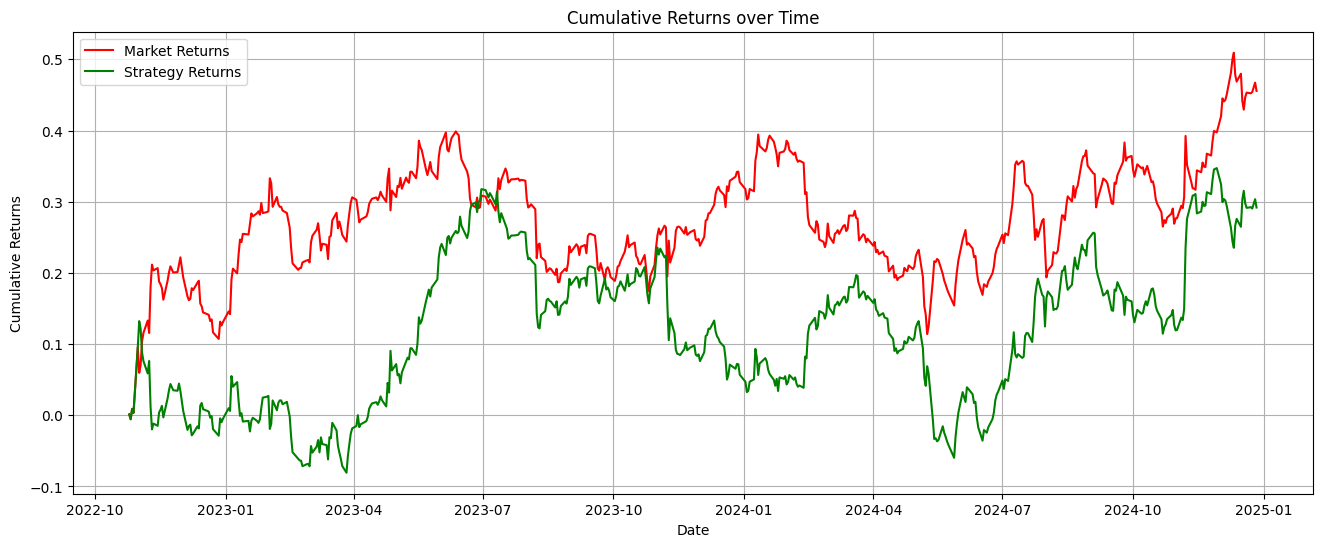

In [112]:
# Plot the cumulative strategy returns over time
plt.figure(figsize = (16, 6))
plt.plot(trade_dataset.index.get_level_values('date'), trade_dataset['Cumulative_Market_Returns'], color = 'r', label = 'Market Returns')
plt.plot(trade_dataset.index.get_level_values('date'), trade_dataset['Cumulative_Strategy_Returns'], color = 'g', label = 'Strategy Returns')
plt.title("Cumulative Returns over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()